In [1]:
import sys
sys.path.append('/../../QmeQ/qmeq/')
#sys.path.append('../qmeq/')
import qmeq
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#DEFINING MY FUNCTIONS

def fermi(mu, E, T):
    return 1/(1+np.exp((E-mu)/T))

def calculate_current(epsilon, mu_L, mu_R, gammaL, gammaR, T_L, T_R):

    fL = fermi(mu_L, epsilon, T_L)
    fR = fermi(mu_R, epsilon, T_R)

    W_1_0 = gammaL*fL+gammaR*fR
    W_0_1 = gammaL*(1-fL)+ gammaR*(1-fR)
    Wsum = W_0_1 + W_1_0
    P_0 = W_0_1/Wsum
    P_1 = W_1_0/Wsum

    I = -(gammaR*fR*P_0 - gammaR*(1-fR)*P_1)

    #------------------calculate cumulants---------------------

    I_mean = gammaL*gammaR*(fL-fR)/(gammaL+gammaR)
    I_var =  gammaL*gammaR*((gammaL**2+gammaR**2)*(fL+fR-2*fL*fR)+2*gammaL*gammaR*(fL*(1-fL)+fR*(1-fR)))/((gammaL+gammaR)**3)
    #(Not actually exactly variance apparently...)

    return I, I_mean, I_var

def calculate_heat_current(I, epsilon, mu):
    E = epsilon*I
    Q = E-mu*I
    return Q



In [3]:
#--SETUP: ---------------------------------------------------------------------------------
epsilon = np.linspace(-100,100,1000) 
V_B = 30
mu_L = -V_B/2       
mu_R = V_B/2        

gammaL = 0.3
gammaR = gammaL
T_L = 20
T_R = 1

100.0


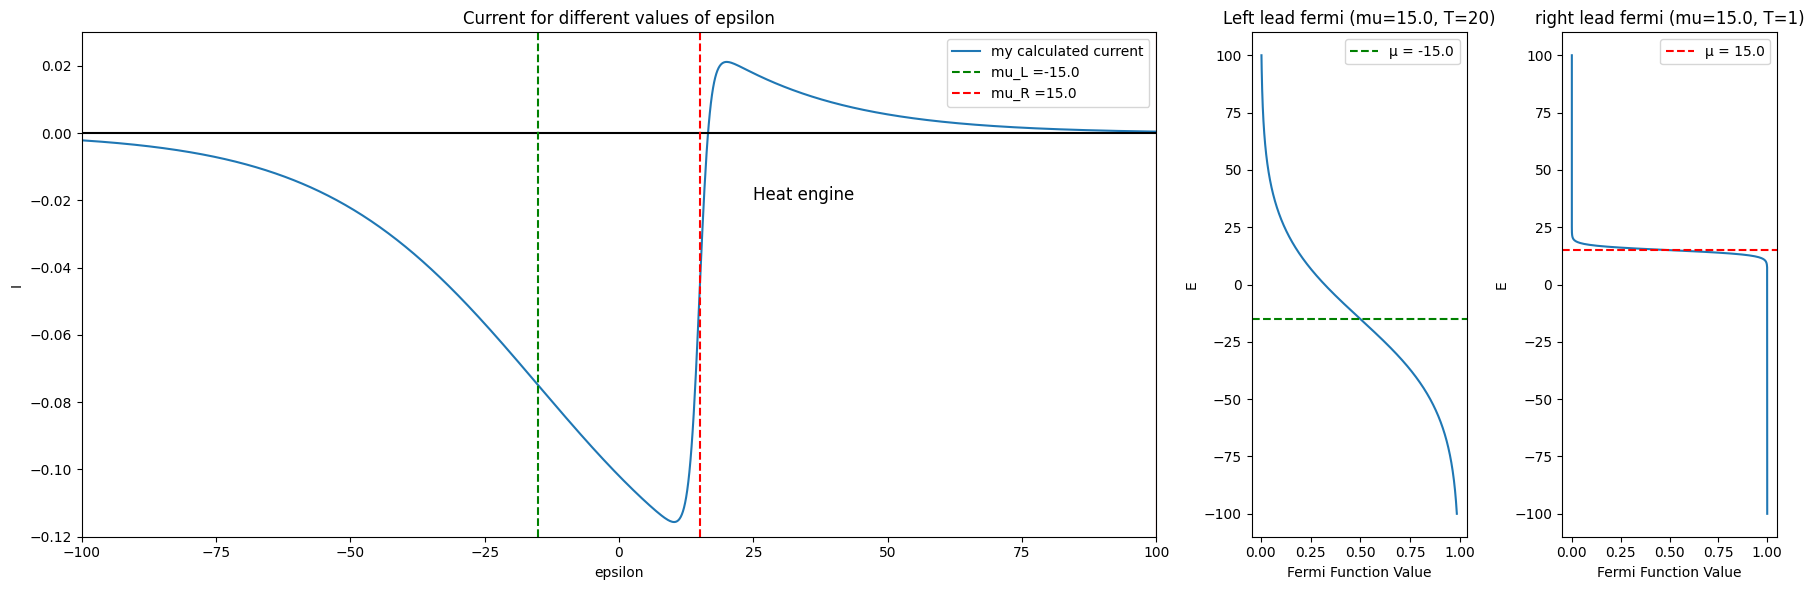

In [ ]:
# With epsilon grid
#---------------------------------------------------------------------------------------------

INPUT = {'epsilon': epsilon,         
            'mu_L': mu_L,
            'mu_R': mu_R,
            'gammaL': gammaL,                   # gamma in left lead
            'gammaR': gammaR,                 # gamma in right lead
            'T_L': T_L,          # Temperature in left lead
            'T_R': T_R}                    # Temperature in right lead
#------------------------------------------------------------------------------------------

I, I_mean, I_var = calculate_current(**INPUT)
eps_from, eps_to = 15, 25
idx_from = np.argmin(np.abs(epsilon-eps_from))
idx_to = np.argmin(np.abs(epsilon-eps_to))
#idx_slice = np.argmin(np.abs(I[45:61])) + 45
idx = np.argmin(np.abs(I[idx_from:idx_to])) + idx_from
eps_at_zero_I = epsilon[idx]
print(eps_at_zero_I)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6), gridspec_kw={'width_ratios': [5, 1, 1]}) 

y_lower, y_upper = -0.12, 0.03
x_lower, x_upper = -100, 100
ax1.plot(epsilon, I, label='I')
ax1.set_ylim(y_lower, y_upper)
ax1.set_xlim(x_lower, x_upper)
ax1.fill_between(epsilon, y_lower, y_upper, where=(epsilon >= eps_at_zero_I) & (epsilon <= x_upper), color='red', alpha=0.3)
ax1.annotate('Heat engine', 
             xy=(25, -0.02),  # Position of the annotation
             xytext=(25, -0.02),  # Position of the text
             fontsize=12, color='black')  # Text customization
ax1.axhline(y=0, color='black', linestyle='-')
ax1.axvline(x=mu_L, color='g', linestyle='--', label=f'mu_L ={mu_L}')
ax1.axvline(x=mu_R, color='r', linestyle='--', label=f'mu_R ={mu_R}')
ax1.set_xlabel('epsilon')
ax1.set_ylabel('I')
ax1.set_title('Current for different values of epsilon')
ax1.legend()

# Second plot - Fermi function in Left lead
fermi_L = fermi(mu_L, epsilon, T_L)
ax2.plot(fermi_L, epsilon)
ax2.axhline(y=mu_L, color='g', linestyle='--', label=f'μ = {mu_L}') 
ax2.set_xlabel('Fermi Function Value')
ax2.set_ylabel('E')
ax2.set_title(f'Left lead fermi (mu={mu_R}, T={T_L})')
ax2.legend()

# Third plot - Fermi function in right lead
fermi_R = fermi(mu_R, epsilon, T_R)
ax3.plot(fermi_R, epsilon)
ax3.axhline(y=mu_R, color='r', linestyle='--', label=f'μ = {mu_R}')
ax3.set_xlabel('Fermi Function Value')
ax3.set_ylabel('E')
ax3.set_title(f'right lead fermi (mu={mu_R}, T={T_R})')
ax3.legend()

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [5]:
#Heat current and efficiency

J_QH = calculate_heat_current(I, epsilon, mu_L)
P = I*V_B
P_qmeq = I_qmeq*V_B
efficiency = P/J_QH
eff_qmeq = P_qmeq/J_QH_qmeq

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5)) 
ax1.plot(epsilon, J_QH, label='my J_QH')
ax1.plot(epsilon, J_QH_qmeq, label='qmeq J_QH')
ax1.set_xlabel('epsilon')
ax1.set_ylabel('Heat current from the left (hot) lead, J_Q')
ax1.set_title(f'Heat current, V_B = {V_B}')
ax1.axhline(y=0, color='black', linestyle='-')
ax1.axvline(x=mu_L, color='g', linestyle='--', label=f'mu_L ={mu_L}')
ax1.axvline(x=mu_R, color='r', linestyle='--', label=f'mu_R ={mu_R}')
ax1.legend()

idx = np.argmin(np.abs(epsilon - mu_R))
ax2.plot(epsilon[idx:], 0.05*efficiency[idx:], label='efficiency*0.05')
ax2.plot(epsilon[idx:], 0.05*eff_qmeq[idx:], label='QMEQ_efficiency*0.05')
ax2.plot(epsilon[idx:], 0.05*P[idx:], label='Power*0.05')
ax2.plot(epsilon[idx:], 0.05*P_qmeq[idx:], label='QMEQ_Power*0.05')
ax2.plot(epsilon[idx:], I_var[idx:], label='<<I^2>>')
ax2.plot(epsilon[idx:], I_var_qmeq[idx:], label='<<I^2>>(QmeQ)')
ax2.set_xlabel('epsilon')
ax2.set_ylabel('Schematic plot')
ax2.set_title('Efficiency, Power and noise, ~ heat engine regime')
ax2.axvline(x=mu_R, color='r', linestyle='--', label=f'mu_R ={mu_R}')
ax2.legend()

NameError: name 'I_qmeq' is not defined

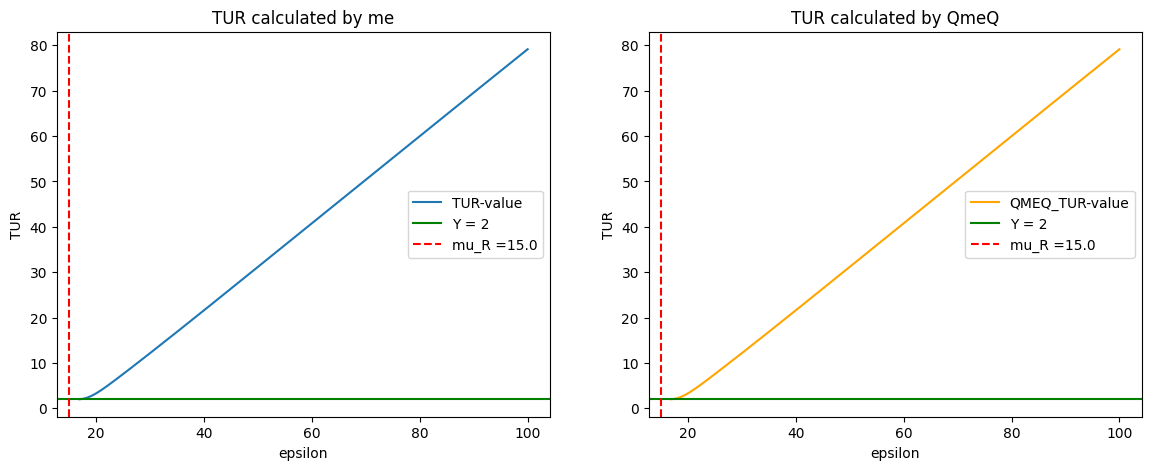

In [ ]:
#TUR

#Left lead = hot
#Right lead = cold

eff_carnot = 1-T_R/T_L
ent_prod = P*(1/T_R)*(eff_carnot-efficiency)/efficiency
ent_prod_qmeq = P_qmeq*(1/T_R)*(eff_carnot-eff_qmeq)/eff_qmeq
TUR = I_var*ent_prod/(I**2)
TUR_qmeq = I_var_qmeq*ent_prod_qmeq/(I_qmeq**2)

#Value 17 hand tuned
idx = np.argmin(np.abs(epsilon - 17))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5)) 
ax1.plot(epsilon[idx:], TUR[idx:], label='TUR-value')
ax1.set_xlabel('epsilon')
ax1.set_ylabel('TUR')
ax1.set_title(f'TUR calculated by me')
ax1.axhline(y=2, color='g', linestyle='-', label= 'Y = 2')
ax1.axvline(x=mu_R, color='r', linestyle='--', label=f'mu_R ={mu_R}')
ax1.legend()

ax2.plot(epsilon[idx:], TUR_qmeq[idx:], color='orange', label='QMEQ_TUR-value')
ax2.set_xlabel('epsilon')
ax2.set_ylabel('TUR')
ax2.set_title(f'TUR calculated by QmeQ')
ax2.axhline(y=2, color='g', linestyle='-', label= 'Y = 2')
ax2.axvline(x=mu_R, color='r', linestyle='--', label=f'mu_R ={mu_R}')
ax2.legend()